In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#Homework 4

Copy this notebook. Rename it as: YOURNAME-HW4-matplotlib-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

.

Upload your completed jupyter notebook to elearning site in a zip labeled with your name, as a minimum something like YOURNAME-HW4.zip Do not put this notebook on your github.

Couple of reference site:
<ul>
<li/>http://matplotlib.org/examples/pylab_examples/
<li/>http://docs.scipy.org/doc/numpy/
</ul>

Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. To do more to create tutorials on how to create an interesting plot or set of plots that are not in this HW.

Describe what you are doing so others can follow in creating the plots.

#### Homework 4.1

4.1.a Create a figure with two subplots in a row.
One shows a sine wave of x from with x = 0 ... 2*pi the other shows the tagent of x with the same range.
Label the figures.

Should look something like:
<img src="./images/Figure_with_multipleplot.png" width="300" height="200">



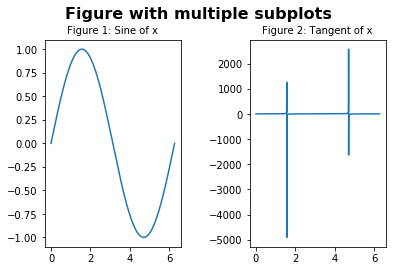

In [5]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
x = np.arange(0, 2*np.pi, .001)
y1 = np.sin(x)
ax1.set_title('Figure 1: Sine of x', fontsize=10)
ax1.plot(x, y1)

ax2 = fig.add_subplot(1,2,2)
y2 = np.tan(x)
ax2.set_title('Figure 2: Tangent of x', fontsize=10)
ax2.plot(x,y2)

fig.tight_layout(pad=2.5) #fixing overlap
fig.suptitle('Figure with multiple subplots', fontsize=16, weight='bold')

plt.show()

#### Homework 4.2
 

Make a combined plot of a  red spiral with a scatter plot.

The red spiral has r from 0 to 3 with steps of 0.1 and
a theta of 2 * pi * r.

The scatter uses the same theta as the spiral but the radius r is offset by a random value ranging from -.5 to .5.
The size of the plotted locations is 100 * r^2 and the color uses theta.

Use an alpha value of .4 for the colors in the scatter plot.
Limit the size of the plot (rmax) to 2.5
 
 Should look something like:
<img src="./images/lineplot_with_scatterplot.png" width="300" height="200">


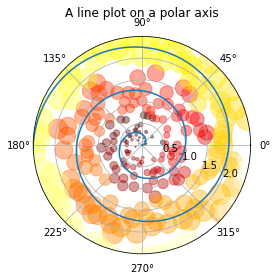

In [45]:
r = np.arange(0, 3, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta,r)
ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

from random import uniform
offset = [uniform(-0.5,0.5) for p in np.arange(0, 3, 0.01)]

r2 = r + offset
ax.scatter(theta, r2, s=100*r2**2, cmap='hot', c=theta, alpha=0.4)

ax.set_rmax(2.5)
ax.set_title("A line plot on a polar axis", va='bottom')

plt.show()

#### Homework 4.3
Create a 2d histogram of 100000 points

x is a generated from a normal random distribution 

y is generated from a geometric random value witha p=.01 
Use the LogNorm color settings for hist2d.
And show the colorbar as well.

Should look something like:
<img src="./images/2d_histogram.png" width="300" height="200">


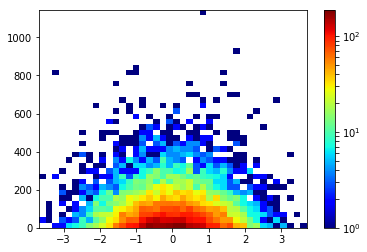

In [193]:
x = np.random.normal(size=10000)
y = np.random.geometric(p=0.01, size=10000)

from matplotlib import colors

plt.hist2d(x,y, bins=40, norm=colors.LogNorm(), cmap="jet")
plt.colorbar()
plt.show()

#### Homework 4.4
Show the same data in homewowrk 4.3 in a 3d plot.
Use a numpy.histrogram2d funtion to generate the data:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

Need to use statements:

<em>from mpl_toolkits.mplot3d import Axes<br/>
fig = plt.figure()<br/>
ax = fig.gca(projection='3d')</em>

...

ax.plot_surface(xm,ym,hist,rstride=1,cstride=1,cmap=plt.cm.jet)

</em>

Should look something like:
<img src="./images/3dplot.png" width="300" height="200">


ValueError: too many values to unpack

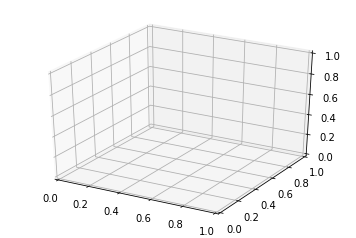

In [248]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')

dx, dy = np.meshgrid(x, y)

hist, xedges, yedges = np.histogram2d(dx,dy, bins=40)
hist = [xedges, yedges]
hist = np.asarray(hist)
hist = hist.reshape(len(hist[0]),2)

#I have no idea how I'm supposed to format the data using histogram2d to make this 3d projection.
#The documentation for plot_surface hasn't been able to help me. It mentions how all three input
#lists have to be 2 dimensional, but no where explain how that 2 dimensional data is used to 
#plot the 3 dimensional mesh. I have no idea what type of data plot_surface() wants, except 
#for the fact that it wants 3 equally sized datasets. Which is thouroughly confusing when
#histogram2d cuts down the dataset size to the bin size while the input x and y datasets are 100000 datapoints.
#Another point, the 100000 datapoints consistently give me memory errors which are only remedied by reducing the dataset
#size, which I understand may be a nudge in the right direction, but still does not remedy the lack of information provided.
ax.plot_surface(dx, dy, hist, rstride=1,cstride=1,cmap=plt.cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



plt.show()

Using a dataset that sampled demographics statistics by zip code, I created a histogram that shows how often whites, blacks, and hispanics are a given percentage makeup of a zip code. The data I loaded in needed some minor modification to make it pandas and programmer friendly. I had all data names forced `upper()` while I replaced all spaces with underscores so I could method reference the columns by name. Also I replaced all `0`'s with `NaN` because there was a lot of incomplete data that skewed the histogram to inaccuratly represent the data.

Text(0,0.5,'Number of Zip Codes')

<Figure size 432x288 with 0 Axes>

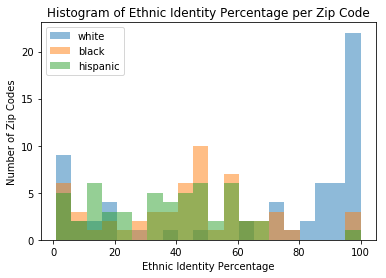

In [268]:
demographics = pd.read_csv('data/Demographic_Statistics_By_Zip_Code.csv')
d = demographics
d.columns = [c.upper().replace(' ', '_') for c in d.columns] #making data code friendly
d = d.replace(0, np.NaN)

df = pd.DataFrame({'white': d.PERCENT_WHITE_NON_HISPANIC, 'black': d.PERCENT_BLACK_NON_HISPANIC,
                   'hispanic': d.PERCENT_HISPANIC_LATINO}, columns=['white', 'black', 'hispanic'])

plt.figure();
ax = df.plot.hist(alpha=0.5, bins=20, title="Histogram of Ethnic Identity Percentage per Zip Code")

ax.set_xticklabels(np.arange(-20,101,20), rotation=0)
ax.set_xlabel('Ethnic Identity Percentage')
ax.set_ylabel('Number of Zip Codes')